In [7]:
import pandas as pd
import numpy as np
import os
import glob

# set infinite display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [10]:
# load the metadata file
df_total = pd.read_csv('../../results/metadata.tsv', sep='\t')

In [11]:
# import filenames inside of ./local_results into list
filenames = glob.glob("../../data/local_results/sf/*")

# only keep filenames with .salmon in them
filenames = [x for x in filenames if '.salmon' in x]

# only keep everything before the first period and after the last /
filenames = [x.split('/')[-1].split('.')[0] for x in filenames]

# see if the filenames match the case_id's in the dataframe
output = []
for x in filenames:
    if x not in df_total['read_group_id'].values:
        output.append(x)
        
print('Number of files in local_results: ', len(filenames))
print('Number of files in local_results that don\'t have an entry in the metadata dataframe: ', len(output))

Number of files in local_results:  133
Number of files in local_results that don't have an entry in the metadata dataframe:  0


In [16]:
#create new dataframe using filemames and only keep the rows that have read_group_id equal to something in filenames
df_current_data = df_total[df_total['read_group_id'].isin(filenames)]

# print the shapes of the dataframes
print('Shape of metadata dataframe: ', df_total.shape)
print('Shape of dataframe with only current data: ', df_current_data.shape)

Shape of metadata dataframe:  (3355, 133)
Shape of dataframe with only current data:  (133, 133)


In [17]:
# preview the dataframe
df_current_data.head()

,case_id,aliquot_id,read_group_id,has_blood_cancer,tissue_type,instrument_model,RIN,includes_spike_ins,library_preparation_kit_name,library_preparation_kit_vendor,library_preparation_kit_version,library_preparation_kit_catalog_number,library_selection,library_strand,library_strategy,size_selection_range,spike_ins_concentration,demographic_id,diagnosis_id,batch_id,index_date,cause_of_death,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,adrenal_hormone,age_at_diagnosis,ajcc_clinical_m,ajcc_clinical_n,ajcc_clinical_stage,ajcc_clinical_t,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,ann_arbor_b_symptoms,ann_arbor_b_symptoms_described,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,ann_arbor_pathologic_stage,best_overall_response,burkitt_lymphoma_clinical_variant,child_pugh_classification,classification_of_tumor,cog_liver_stage,cog_neuroblastoma_risk_group,cog_renal_stage,cog_rhabdomyosarcoma_risk_group,created_datetime,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,diagnosis_is_primary_disease,eln_risk_classification,enneking_msts_grade,enneking_msts_metastasis,enneking_msts_stage,enneking_msts_tumor_site,esophageal_columnar_dysplasia_degree,esophageal_columnar_metaplasia_present,figo_stage,figo_staging_edition_year,first_symptom_prior_to_diagnosis,gastric_esophageal_junction_involvement,gleason_grade_group,gleason_grade_tertiary,gleason_patterns_percent,goblet_cells_columnar_mucosa_present,icd_10_code,igcccg_stage,inpc_grade,inpc_histologic_group,inrg_stage,inss_stage,international_prognostic_index,irs_group,irs_stage,ishak_fibrosis_score,iss_stage,last_known_disease_status,laterality,margin_distance,margins_involved_site,masaoka_stage,medulloblastoma_molecular_classification,metastasis_at_diagnosis,metastasis_at_diagnosis_site,method_of_diagnosis,micropapillary_features,mitosis_karyorrhexis_index,mitotic_count,morphology,ovarian_specimen_status,ovarian_surface_involvement,papillary_renal_cell_type,peritoneal_fluid_cytological_status,pregnant_at_diagnosis,primary_diagnosis,primary_disease,primary_gleason_grade,prior_malignancy,prior_treatment,progression_or_recurrence,project_id.1,residual_disease,satellite_nodule_present,secondary_gleason_grade,site_of_resection_or_biopsy,sites_of_involvement,submitter_id,supratentorial_localization,synchronous_malignancy,tissue_or_organ_of_origin,tumor_confined_to_organ_of_origin,tumor_depth,tumor_focality,tumor_grade,tumor_regression_grade,updated_datetime,weiss_assessment_score,who_cns_grade,who_nte_grade,wilms_tumor_histologic_subtype,year_of_diagnosis,disease_type,primary_site,project_id
9,d4f90900-3b81-4015-8e11-4b4525345063,05107a4e-d208-4225-b989-59483fb418e5,ff85f46a-73a4-4663-bd80-fd4ff855851b,False,Normal,Illumina HiSeq 4000,NaN,True,TruSeq Stranded Total RNA Library Prep Kit wit...,Illumina,NaN,NaN,rRNA Depletion,First_Stranded,RNA-Seq,295.0,1.0,45cbf0c1-8153-40b8-8609-a6cfa9bdc02d,d8eafcda-f5ac-40d5-9c19-b3c008ba9635,2.0,Diagnosis,NaN,-21194.0,NaN,not hispanic or latino,male,white,Alive,NaN,21194.0,M0,NaN,NaN,NaN,Unknown,N0,Stage IB,T2a,7th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-17T10:10:13.092460-05:00,NaN,NaN,1805.0,1805.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,With tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8140/3,NaN,NaN,NaN,NaN,NaN,"Adenocarcinoma, NOS",NaN,NaN,NaN,NaN,yes,CPTAC-3,R0,NaN,NaN,"Lower lobe, lung",NaN,C3L-00080-DIAG,NaN,NaN,"Lower lobe, lung",NaN,NaN,Unifocal,G2,NaN,2023-02-03T18:28:48.308091-06:00,NaN,NaN,NaN,NaN,2016.0,Adenomas and Adenocarcinomas,Bronchus and lung,CPTAC-3
44,56fe0392-faa7-4f21-b17d-c2e1b36e6f97,44b7205e-de41-4d5c-9bc1-074e7638b5ea,25a99d0e-a999-41bf-be24-7d948d5e8611,False,Tumor,Illumina HiSeq 4000,NaN,True,TruSeq Stranded Total RNA Library Prep Kit wit...,Illumina,NaN,NaN,rRNA Depletion

In [20]:
# print disease counts from both dataframes
print('Disease counts from metadata dataframe: ')
print(df_total['disease_type'].value_counts())
print('\nDisease counts from dataframe with only current data: ')
print(df_current_data['disease_type'].value_counts())

Disease counts from metadata dataframe: 
Adenomas and Adenocarcinomas            1555
Squamous Cell Neoplasms                  669
Gliomas                                  261
Ductal and Lobular Neoplasms             260
Nevi and Melanomas                       239
Myeloid Leukemias                        179
Soft Tissue Tumors and Sarcomas, NOS     164
Not Applicable                            27
Name: disease_type, dtype: int64

Disease counts from dataframe with only current data: 
Adenomas and Adenocarcinomas            56
Squamous Cell Neoplasms                 29
Ductal and Lobular Neoplasms            13
Gliomas                                 11
Nevi and Melanomas                      11
Myeloid Leukemias                        8
Soft Tissue Tumors and Sarcomas, NOS     4
Not Applicable                           1
Name: disease_type, dtype: int64


/var/folders/n5/_h8qqt011vq0417yxq9kch240000gq/T/ipykernel_44370/622192867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_data['age_at_diagnosis'] = df_current_data['age_at_diagnosis']/365


<Axes: title={'center': 'age_at_diagnosis'}, xlabel='disease_type'>

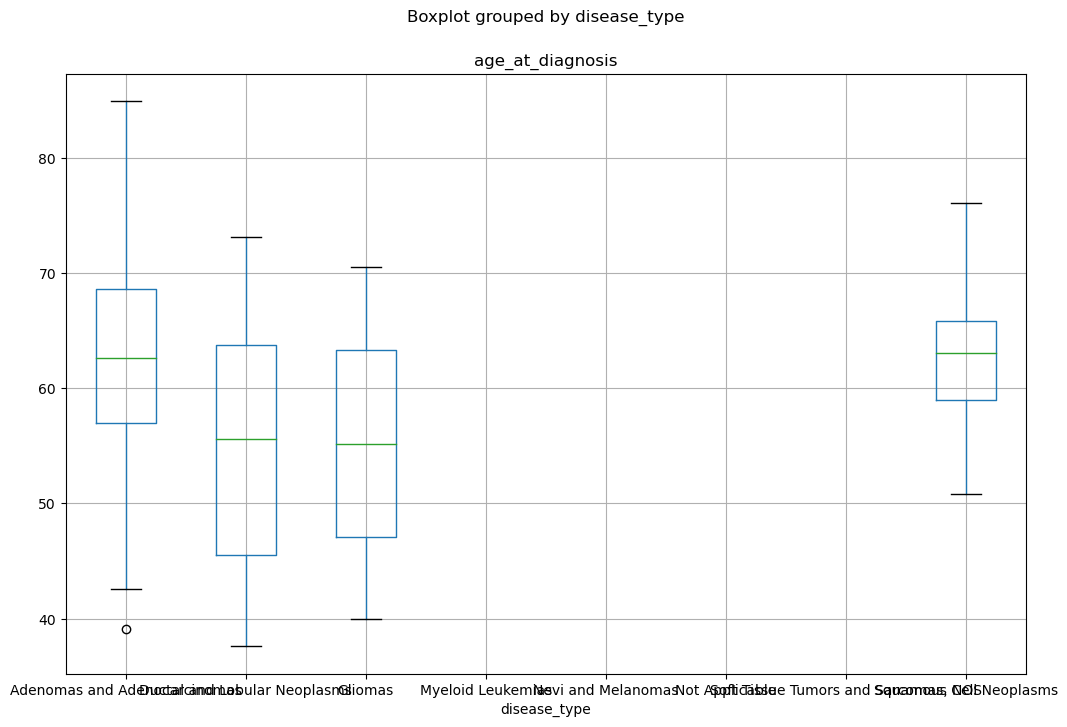

In [21]:
# plot box plot of age_at_diagnosis (convert to years) for each disease_type_x
df_current_data['age_at_diagnosis'] = df_current_data['age_at_diagnosis']/365
df_current_data.boxplot(column='age_at_diagnosis', by='disease_type', figsize=(12,8))

In [22]:
# print missing and total values for age_at_diagnosis in the dataframe with only current data
print('Missing values for age_at_diagnosis: ', df_current_data['age_at_diagnosis'].isnull().sum())
print('Total values for age_at_diagnosis: ', len(df_current_data['age_at_diagnosis']))

# print missing and total values for race in the dataframe with only current data
print('Missing values for race: ', df_current_data['race'].isnull().sum())
print('Total values for race: ', len(df_current_data['race']))

# print missing and total values for gender in the dataframe with only current data
print('Missing values for gender: ', df_current_data['gender'].isnull().sum())
print('Total values for gender: ', len(df_current_data['gender']))

Missing values for age_at_diagnosis:  49
Total values for age_at_diagnosis:  133
Missing values for race:  45
Total values for race:  133
Missing values for gender:  45
Total values for gender:  133


In [23]:
#run a chi square test to see if disease_type is significantly different because of gender using df_current_data
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Assuming that df_current_data is a DataFrame with 'disease_type_x' and 'gender' columns
contingency_table = pd.crosstab(df_current_data['disease_type'], df_current_data['gender'])

# Perform Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic, p-value and degrees of freedom
print(f"Test statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Print the expected contingency table
print("Expected contingency table:")
print(expected)

Test statistic: 10.467848231823389
P-value: 0.01498059479208916
Degrees of freedom: 3
Expected contingency table:
[[24.81818182 27.18181818]
 [ 5.25        5.75      ]
 [ 1.90909091  2.09090909]
 [10.02272727 10.97727273]]


In [24]:
#run a chi square test to see if disease_type_x is significantly different because of race using df_current_data
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Assuming that df_current_data is a DataFrame with 'disease_type_x' and 'race' columns
contingency_table = pd.crosstab(df_current_data['disease_type'], df_current_data['race'])

# Perform Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic, p-value and degrees of freedom
print(f"Test statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Print the expected contingency table
print("Expected contingency table:")
print(expected)

Test statistic: 3.9155705467072113
P-value: 0.6881009853694183
Degrees of freedom: 6
Expected contingency table:
[[10.04545455  8.27272727 33.68181818]
 [ 2.125       1.75        7.125     ]
 [ 0.77272727  0.63636364  2.59090909]
 [ 4.05681818  3.34090909 13.60227273]]
